# Converting Json into CSV file เปลี่ยน Json เป็นไฟล์ CSV

In [1]:
import pandas as pd
!pip install py7zr
import py7zr
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD,Adam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 22.4 MB/s eta 0:00:00


In [2]:
with py7zr.SevenZipFile('/kaggle/input/statoil-iceberg-classifier-challenge/train.json.7z', mode='r') as z:
    z.extractall()
    
with py7zr.SevenZipFile('/kaggle/input/statoil-iceberg-classifier-challenge/test.json.7z', mode='r') as z1:
    z1.extractall()

In [3]:
#from google.colab import drive

#drive.mount('/content/drive')

Import lib ที่ใช้

In [4]:
import pandas as pd

import numpy as np

import pandas as pd

import numpy as np

import cv2

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Activation

from keras.layers import Conv2D, MaxPooling2D,Input

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from keras.optimizers import Adam

In [5]:
train = pd.read_json('/kaggle/working/data/processed/train.json')
test = pd.read_json('/kaggle/working/data/processed/test.json')

In [6]:
#train = pd.read_json('/content/drive/MyDrive/Dataset/train.json')
#test = pd.read_json('/content/drive/MyDrive/Dataset/test.json')

In [7]:
def get_scaled_imgs(df):

    imgs = []



    for i, row in df.iterrows():

        #make 75x75 image

        band_1 = np.array(row['band_1']).reshape(75, 75)

        band_2 = np.array(row['band_2']).reshape(75, 75)

        band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)



        # Rescale

        a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())

        b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())

        c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())



        imgs.append(np.dstack((a, b, c)))



    return np.array(imgs)

In [8]:
from sklearn.model_selection import train_test_split



data = get_scaled_imgs(train)

target = np.array(train['is_iceberg'])



train.inc_angle = train.inc_angle.replace('na',0)

idx_tr = np.where(train.inc_angle>0)

Ytrain = target[idx_tr[0]]

Xtrain = data[idx_tr[0],...]



x_train,x_test,y_train,y_test=train_test_split(Xtrain,Ytrain,test_size=0.2,random_state=1)

/tmp/ipykernel_30/2488343485.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.inc_angle = train.inc_angle.replace('na',0)


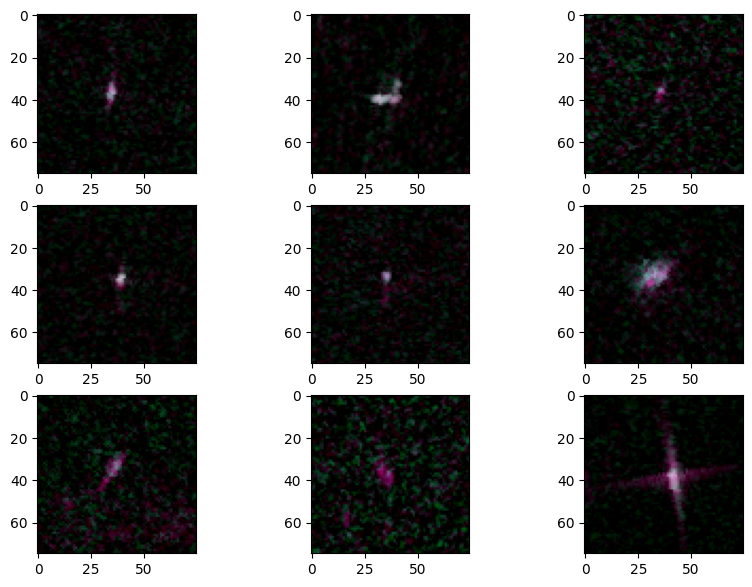

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

rows = 3

columns = 3

# วนลูปเพิ่ม subplot ลง figure

for i in range(9):

    # เพิ่ม subplot ในตำแหน่ง i+1

    fig.add_subplot(rows, columns, i+1)

    plt.imshow(data[i])

In [10]:
print(train['is_iceberg'])

0       0
1       0
2       1
3       0
4       0
       ..
1599    0
1600    0
1601    0
1602    0
1603    0
Name: is_iceberg, Length: 1604, dtype: int64


In [11]:
def createModel(num_filters,filter_size,pool_size):

  model = Sequential([

    Input(shape = (75, 75, 3)),

    Conv2D(num_filters,filter_size,activation = 'relu',padding = 'same',strides = 2),

    MaxPooling2D(pool_size = pool_size),



    Conv2D(128,filter_size,activation = 'relu',padding = 'same',strides = 2),

    MaxPooling2D(pool_size = 2),



    Conv2D(128,filter_size,activation = 'relu',padding = 'same',strides = 2),

    MaxPooling2D(pool_size = 2),



    Conv2D(num_filters,filter_size,activation = 'relu',padding = 'same',strides = 2),

    MaxPooling2D(pool_size = 2),

    Flatten(),

    Dense(512,activation ='relu'),

    Dense(256,activation ='relu'),

    Dense(1,activation ='relu')])

  optimizer = Adam(learning_rate=0.001, decay=0.0)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

In [12]:
CNNModel = createModel(3,64,3)

CNNModel.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 38, 38, 3)      │        36,867 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 128)      │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 128)      │    67,108,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 3)        │     1,572,867 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 0, 0, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,423,815 (268.65 MB)

 Trainable params: 70,423,815 (268.65 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.applications import VGG16

from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam



# Load pre-trained VGG16 model without the top layer

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(75, 75, 3))



# Add custom layers for binary classification

x = Flatten()(base_model.output)

x = Dense(256, activation='relu')(x)

x = Dropout(0.5)(x)

output_layer = Dense(1, activation='sigmoid')(x)  # Single neuron for binary classification



# Create the new model

model = Model(inputs=base_model.input, outputs=output_layer)



# Compile the model with binary cross-entropy loss

optimizer = Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 75, 75, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 75, 75, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,239,489 (58.13 MB)

 Trainable params: 15,239,489 (58.13 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(x_train,y_train,epochs=25)

Epoch 1/25


I0000 00:00:1730559738.626054     116 service.cc:145] XLA service 0x7e945c004180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730559738.626111     116 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730559738.626116     116 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/37 ━━━━━━━━━━━━━━━━━━━━ 8:11 14s/step - accuracy: 0.5625 - loss: 0.6958

I0000 00:00:1730559748.454614     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 24s 274ms/step - accuracy: 0.5743 - loss: 0.6861
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8164 - loss: 0.3826
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8158 - loss: 0.3659
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8809 - loss: 0.2722
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8820 - loss: 0.2547
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8858 - loss: 0.2614
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9015 - loss: 0.2014
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8813 - loss: 0.2186
Epoch 9/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9175 - loss: 0.1749
Epoch 10/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9484 - loss: 0.1345
Epoch 11/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9633 - loss: 0.0913
Epoch 12/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9520 -

In [16]:
def answer(ModelPrediction):

  Prediction = []

  for i in range(len(ModelPrediction)):

    if(ModelPrediction[i]>=1):

      Prediction.append(1)

    elif(ModelPrediction[i]<1):

      Prediction.append(0)

    else:

      print("err")

  return Prediction

In [17]:
prediction = model.predict(x_test)

print(answer(prediction))

print(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 

In [18]:
test_images = get_scaled_imgs(test)

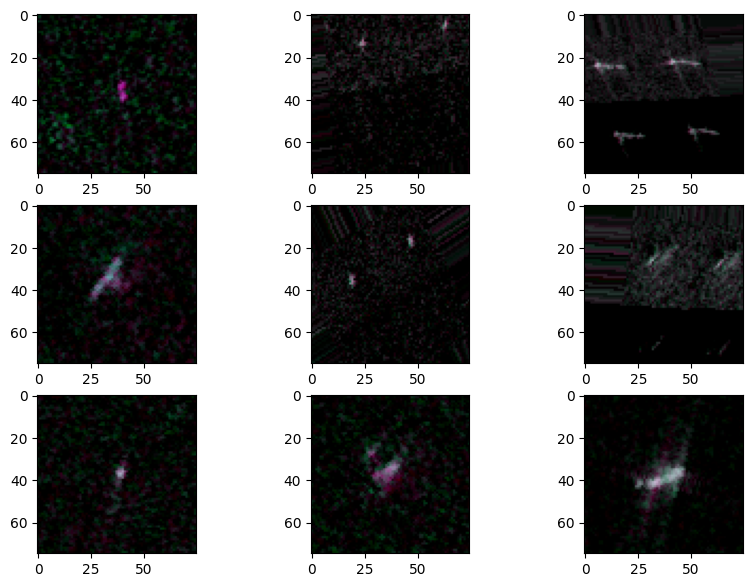

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

rows = 3

columns = 3

for i in range(9):

    fig.add_subplot(rows, columns, i+1)

    plt.imshow(test_images[i])

In [20]:
ModelPrediction = model.predict(test_images)

264/264 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


In [21]:
ans = answer(ModelPrediction)

print(ans)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 

In [22]:
predicted = model.predict(test_images)

print(predicted[:10])

264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
[[3.1186410e-06]
 [4.2194717e-02]
 [6.4265187e-20]
 [1.0000000e+00]
 [2.4203111e-06]
 [2.0355510e-06]
 [7.7692860e-08]
 [1.0000000e+00]
 [1.2597214e-18]
 [1.2781926e-19]]


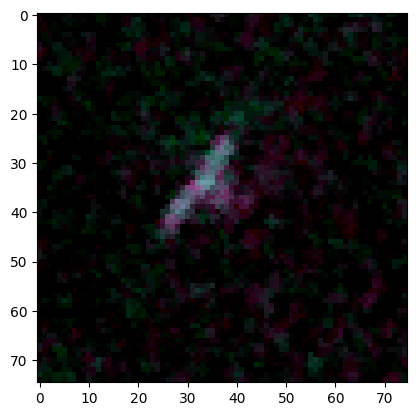

In [23]:
plt.imshow(test_images[3])

In [24]:
submission = pd.DataFrame()

submission['id'] = test['id']

submission['is_iceberg'] = predicted.reshape((predicted.shape[0]))

submission.to_csv('submission.csv', index = False)

submission

,id,is_iceberg
0,5941774d,3.118641e-06
1,4023181e,4.219472e-02
2,b20200e4,6.426519e-20
3,e7f018bb,1.000000e+00
4,4371c8c3,2.420311e-06
...,...,...
8419,16ee9b50,5.086113e-31
8420,5a599eb7,1.125559e-02
8421,df30d6dd,3.196241e-06
8422,18af95b1,1.000000e+00
